In [41]:
import pandas as pd
import tweepy
import datetime as dt
import nltk
import matplotlib as plt
from textblob import TextBlob
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk import FreqDist, classify, NaiveBayesClassifier
import re, string, random
import numpy as np
import nltk
import gensim
from collections import Counter
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.corpus import twitter_samples, stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist, classify, NaiveBayesClassifier
import re, string, random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from dateutil.parser import parser


ModuleNotFoundError: No module named 'Date'

In [7]:
def Vader(df):
    #updating
    nltk.download('vader_lexicon')
    
    #Initializing Sentiment Analysis of VADER
    sid = SentimentIntensityAnalyzer()
    
    #Filling Nulls
    df = df.fillna('')
    
    #Analysis
    df['Vader'] = df['Tweet Text'].apply(lambda cleaned: sid.polarity_scores(cleaned))
    df['compound']  = df['Vader'].apply(lambda score_dict: score_dict['compound'])
    df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
    
    #Overall Result
    
    #pos
    try:
        pos = df.get('comp_score').value_counts()[0]
    except IndexError as e:
        pos = 0
    
    #neg
    try:
        neg = df.get('comp_score').value_counts()[1]
    except IndexError as e:
        neg = 0

    #Printing
    print('Positive Percentage : ', pos/(pos+neg)*100)
    print('Negative Percentage : ', neg/(pos+neg)*100)
    
    print(df.get('comp_score').value_counts().plot(kind='bar'))
    
    return df
    

In [8]:
df = pd.read_csv('Twitter_data.csv')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/divyamrana/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Positive Percentage :  81.69450572539132
Negative Percentage :  18.305494274608677
AxesSubplot(0.125,0.125;0.775x0.755)


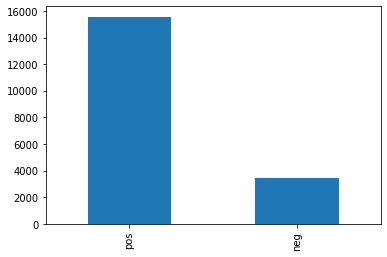

In [11]:
df = Vader(df)

In [16]:
df = df.sort_values(by = ['Tweet Datetime'])

In [17]:
df

,Unnamed: 0,Tweet Text,Tweet Datetime,GEO,Retweets,Favorites,Language,Source,Replied Tweet Id,Replied Tweet User Id Str,Quote Status Bool,Follower Count,Vader,compound,comp_score
13000,1337,What percent of the U.S. federal budget is spe...,,,,,,,,,,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
12950,Check your answer here: https://t.co/fvA5VkjE3r,2017-07-13 16:03:16,,431.0,2060.0,en,Twitter for Windows,,,False,55960156,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
12949,1287,How many jobs are supported by the NIH?,,,,,,,,,,,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.3182,pos
13001,Check your answer here: https://t.co/Kdu6XYg3Bu,2017-05-20 14:49:50,,985.0,2669.0,en,Twitter for Windows,,,False,55960156,,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
14272,1248,Visited Retail Stores in Palo Alto today. Seei...,2013-09-20 19:02:22,,6224.0,3762,en,Twitter for iPhone,,,False,13097421.0,"{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'comp...",0.6096,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11640,0,@TrungTPhan 🤣🤣,2021-11-06 21:03:41,,201.0,6586,und,Twitter for iPhone,1457073896289492992.0,945817135816654848,False,62562259.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2701,1,Having a single cloud provider is so last deca...,2021-11-06 21:15:13,,0.0,2,en,True Anthem,,,False,463460.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
8640,0,Give the gift of warmth to your loved one who ...,2021-11-06 21:17:06,,9.0,21,en,SocialFlow,,,False,10259386.0,"{'neg': 0.12, 'neu': 0.502, 'pos': 0.378, 'com...",0.7717,pos
10140,0,Although PCs are still selling at a greater vo...,2021-11-06 21:17:12,,1.0,2,en,SocialFlow,,,False,1149049.0,"{'neg': 0.163, 'neu': 0.724, 'pos': 0.113, 'co...",-0.0258,neg


In [19]:
df['Tweet Text'][i]

'@ZachInglis @amiridis @jasonfried It’s a was a conscious compromise to ship, stay compliant with GDPR for those who wanted all data gone, and cut with the grain of an existing billing system. But agree it’s not right.  We will change it so you have the choice between instant and end-of-billing 👍'

In [ ]:
from datetime import datetime
def spl(x):
    return x.split(' ')[0]
df['Tweet Datetime'] = df['Tweet Datetime'].apply(spl)

In [70]:
apple = pd.DataFrame(columns=df.columns)

for i in range(df.shape[0]):
    if 'Sony' in df['Tweet Text'][i] :
        a_series = pd.Series(df.loc[i], index = df.columns)
        apple = apple.append(a_series, ignore_index=True)

In [71]:
(apple.groupby('Tweet Datetime').sum()).to_csv('Sony Sentiment.csv')

In [36]:
df.get('Tweet Datetime')[3].split(' ')

['2021-11-06', '19:22:03']

In [49]:
from datetime import datetime
def spl(x):
    return x.split(' ')[0]

In [53]:
df['Tweet Datetime'] = df['Tweet Datetime'].apply(spl)